In [1]:
from car import Car
from road import Road
from simulation import Simulation
import numpy as np
from unittest import mock
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [264]:
road = Road(length=1000)
def make_cars(num=10, slowing_chance=0.1, desired_speed=33.333):
    cars = []
    for i in range(num, 0, -1):
        car = Car(road, position=i*33, slowing_chance=0.1, desired_speed=desired_speed) # reverse order required here...
        cars.append(car)
    return cars

In [232]:
cars = make_cars(30)

In [265]:
def run_sim(discard_steps=60, run_steps=300):
    sim = Simulation(cars=cars, steps=discard_steps)
    sim.start()
    sim.run()

    sim = Simulation(cars=cars, steps=run_steps)

    sim.start()
    positions, speeds = sim.run()
    return positions, speeds

In [266]:
def plot_sim(title):
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title(title)
    for i in range(0, len(cars), 2):
        plt.scatter(range(len(positions)), positions[:,i])#, speeds[:,i])
        plt.scatter(range(len(positions)), positions[:,i+1], c='g')#, speeds[:,i+1], c='g')
    plt.subplots_adjust(left=2, right=4)
    print('mean: {} std: {}'.format(speeds[:,0].mean(), speeds[:,0].std()))

In [408]:
cars = make_cars(30, slowing_chance=0.5, desired_speed=100)

In [409]:
%%capture
positions, speeds = run_sim()

##Note: The plots below use a version of the code with decel_rate doubled

mean: 23.209302325581394 std: 14.373264905077162


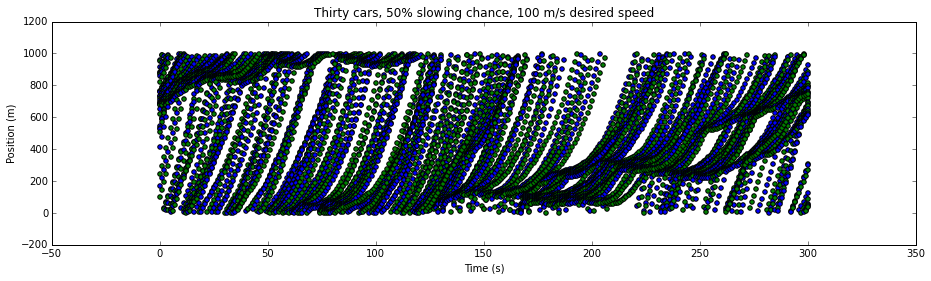

In [410]:
plot_sim('Thirty cars, 50% slowing chance, 100 m/s desired speed')

mean: 36.943521594684384 std: 15.125613561274642


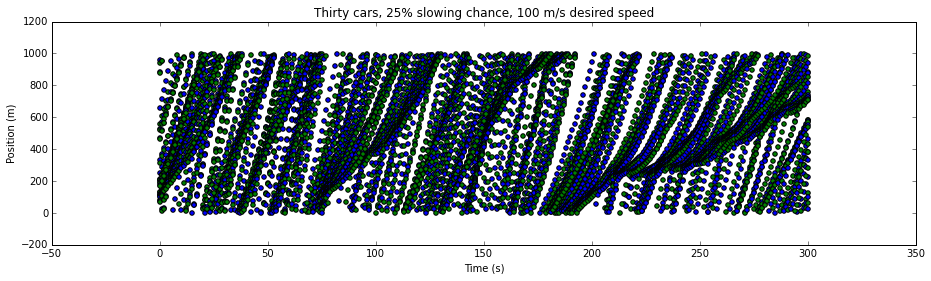

In [394]:
plot_sim('Thirty cars, 25% slowing chance, 100 m/s desired speed')

mean: 21.282392026578073 std: 14.359989250977023


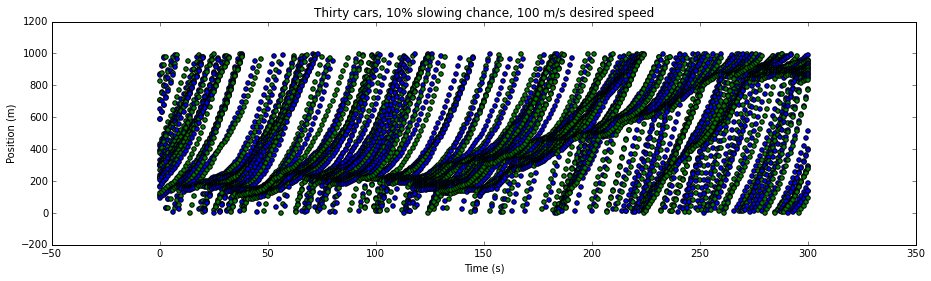

In [364]:
plot_sim('Thirty cars, 10% slowing chance, 100 m/s desired speed')

mean: 48.99667774086379 std: 1.9194724131005458


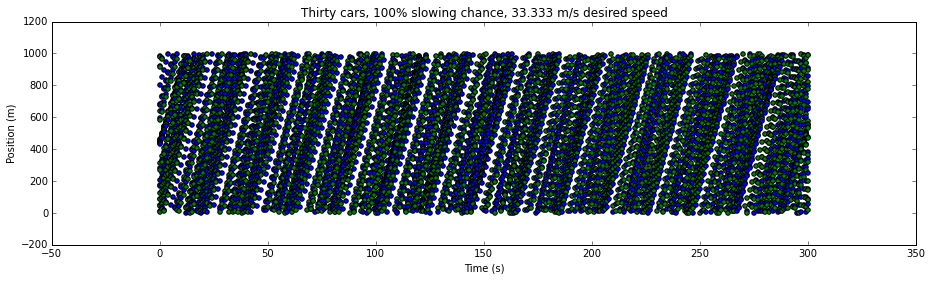

In [352]:
plot_sim('Thirty cars, 100% slowing chance, 33.333 m/s desired speed')

mean: 31.975312292358797 std: 2.332496706506185


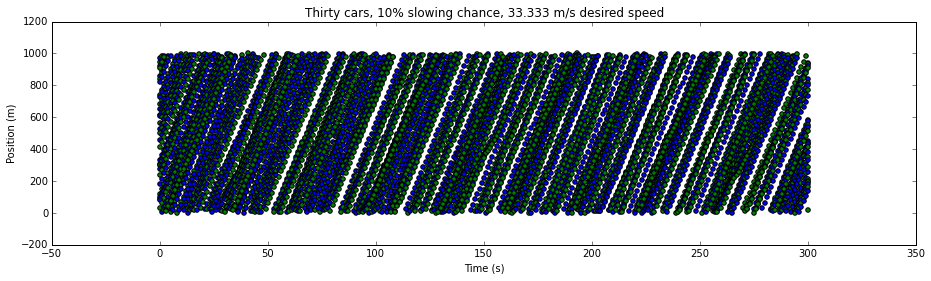

In [298]:
plot_sim('Thirty cars, 10% slowing chance, 33.333 m/s desired speed')